# Tensor images
This notebook gives an overview of the concept of tensor images, and demonstrates how to use this feature.

In [1]:
import diplib as dip

DIPlib -- a quantitative image analysis library
Version 3.3.0 (Nov 30 2022)
For more information see https://diplib.org


After reading the "*PyDIP* basics" notebook, you should be familiar with the concepts of scalar images and color images. We remind the reader that an image can have any number of values associated to each pixel. An image with a single value per pixel is a scalar image. Multiple values can be arranged in one or two dimensions, as a vector image or a matrix image. A color image is an example of a vector image, for example in the RGB color space the vector for each pixel has 3 values, it is a 3D vector.

The generalization of vectors and matrices is a tensor. A rank 0 tensor is a scalar, a rank 1 tensor is a vector, and a rank 2 tensor is a matrix.

This is a scalar image:

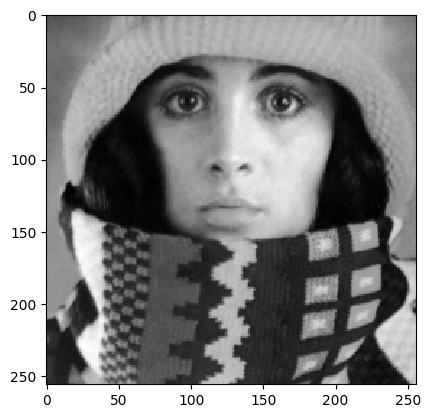

In [2]:
img = dip.ImageRead('../trui.ics')
img.Show()

We can compute its gradient, which is a vector image: 

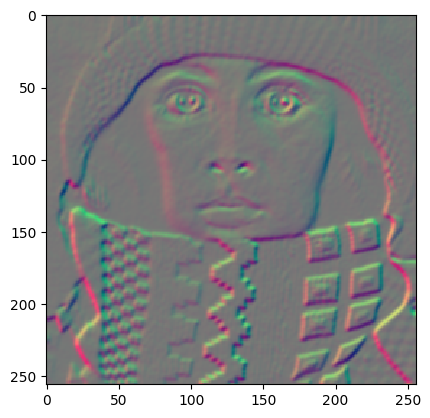

In [3]:
g = dip.Gradient(img)
g.Show()

The vector image is displayed by showing the first vector component in the red channel, and the second one in the green channel. `g` has two components:

In [4]:
print(g.TensorElements())

2


In [5]:
print(g.TensorShape())

column vector


Multiplying a vector with its transposed leads to a symmetric matrix:

In [6]:
S = g @ dip.Transpose(g)
print("Tensor size:", S.TensorSizes())
print("Tensor shape:", S.TensorShape())
print("Tensor elements:", S.TensorElements())

Tensor size: [2, 2]
Tensor shape: symmetric matrix
Tensor elements: 3


Note how the 2x2 symmetric matrix stores only 3 elements per pixel. Because of the symmetry, the `[0,1]` and the `[1,0]` elements are identical, and need not be both stored. See [the documentation](https://diplib.org/diplib-docs/dip-Tensor.html#dip-Tensor-Shape) for details on how the individual elements are stored.

Local averaging of this matrix image (i.e. applying a low-pass filter) leads to the structure tensor:

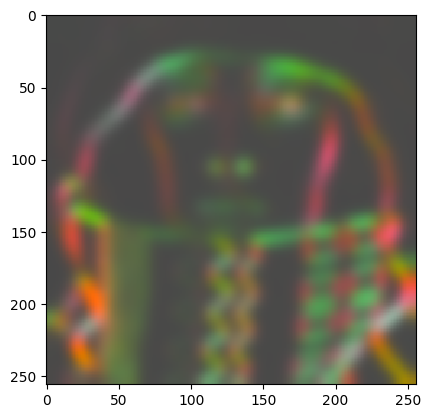

In [7]:
dip.Gauss(S, out=S, sigmas=5)
S.Show()

We can still display this tensor image, because it has only 3 tensor elements, which can be mapped to the three RGB channels of the display.

The structure tensor is one of the more important applications for the concept of the tensor image. In [this documentation page](https://diplib.org/diplib-docs/why_tensors.html) there are some example applications of the structure tensor. Here we show how to get the local orientation from it using the eigenvalue decomposition.

In [8]:
eigenvalues, eigenvectors = dip.EigenDecomposition(S)
print(eigenvalues.TensorShape())
print(eigenvectors.TensorShape())

diagonal matrix
column-major matrix


The eigendecomposition is such that `S * eigenvectors == eigenvectors * eigenvalues`. `eigenvectors` is a full 2x2 matrix, and hence has 4 tensor elements. These are stored in column-major order. The first column is the eigenvector that corresponds to the first eigenvalue. Eigenvalues are sorted in descending order, and hence the first eigenvector is perpendicular to the edges in the image.

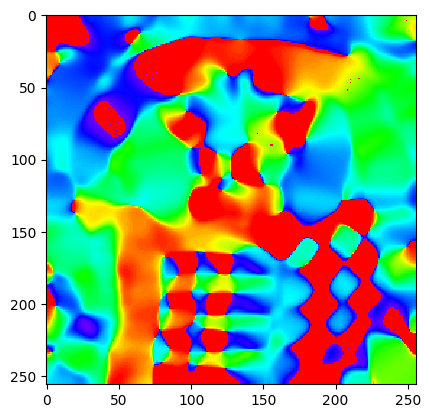

In [9]:
v1 = eigenvectors.TensorColumn(0)
angle = dip.Angle(v1)
angle.Show('orientation')

Note that extracting a column from the tensor yields a vector image, and that this vector image shares data with the column-major matrix image. Transposing a matrix is a cheap operation that just changes the storage order of the matrix, without a need to copy or reorder the data:

In [10]:
tmp = dip.Transpose(eigenvectors)
print(tmp.TensorShape())
print(tmp.SharesData(eigenvectors))

row-major matrix
True


A second important matrix image is the Hessian matrix, which contains all second order derivatives. Just like the strucutre tensor, it is a symmetric 2x2 matrix:

Tensor size: [2, 2]
Tensor shape: symmetric matrix
Tensor elements: 3


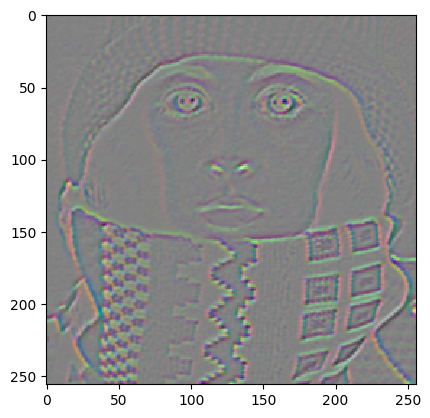

In [11]:
H = dip.Hessian(img)
print("Tensor size:", S.TensorSizes())
print("Tensor shape:", S.TensorShape())
print("Tensor elements:", S.TensorElements())
H.Show()